In [1]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = 'Faceshape_dataset'
# The dataset folder is inside a subdirectory called 'dataset'
base_dir = os.path.join(dataset_path)
print('using dataset folder: ', base_dir)
#list the subdirectories in base_dir
subdirs = os.listdir(base_dir)
print('subdirectories in base_dir: ', subdirs)

using dataset folder:  Faceshape_dataset
subdirectories in base_dir:  ['test', 'train']


In [3]:

# Prepare a list to collect file paths and labels
data = []

# Iterate over the subdirectories (e.g., 'train' and 'test')
for split in subdirs:
    split_dir = os.path.join(base_dir, split)
    if not os.path.isdir(split_dir):
        print(f"Warning: {split_dir} is not a directory. Skipping.")
        continue
    # List class folders within each split directory
    class_folders = [os.path.join(split_dir, folder) for folder in os.listdir(split_dir)
                     if os.path.isdir(os.path.join(split_dir, folder))]
    print(f"Found class folders in '{split}':", [os.path.basename(cf) for cf in class_folders])

    # Iterate over each class folder
    for class_folder in class_folders:
        label = os.path.basename(class_folder)  # Use folder name as label (e.g., 'Heart')
        # Get all image file paths; adjust pattern if needed for your image types
        image_files = glob.glob(os.path.join(class_folder, '*.*'))
        print(f"Found {len(image_files)} files in '{label}' folder under '{split}'.")
        for img_path in image_files:
            data.append({'filepath': img_path, 'label': label, 'original_split': split})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Check that the DataFrame contains the 'label' column and print key information
if 'label' in df.columns and not df.empty:
    print("Total samples in the dataset:", len(df))
    print("Class distribution:")
    print(df['label'].value_counts())
else:
    raise KeyError("The 'label' column is missing from the DataFrame or no data was found.")

# Split the dataset into train (70%), validation (20%), and test (10%)
# First, split out the test set (10% of the data)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['label'],
    random_state=42
)

# From the remaining 90%, allocate 20% of the overall data to validation.
# That is approximately 22.22% of train_val_df.
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2222,  # ~20% of overall data
    stratify=train_val_df['label'],
    random_state=42
)

# Display the number of samples for each split
print("\nTrain samples:", len(train_df))
print("Validation samples:", len(val_df))
print("Test samples:", len(test_df))

# Save the splits to CSV for further processing (optional)
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)


Found class folders in 'test': ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
Found 200 files in 'Heart' folder under 'test'.
Found 200 files in 'Oblong' folder under 'test'.
Found 199 files in 'Oval' folder under 'test'.
Found 199 files in 'Round' folder under 'test'.
Found 200 files in 'Square' folder under 'test'.
Found class folders in 'train': ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
Found 798 files in 'Heart' folder under 'train'.
Found 798 files in 'Oblong' folder under 'train'.
Found 797 files in 'Oval' folder under 'train'.
Found 789 files in 'Round' folder under 'train'.
Found 799 files in 'Square' folder under 'train'.
Total samples in the dataset: 4979
Class distribution:
label
Square    999
Heart     998
Oblong    998
Oval      996
Round     988
Name: count, dtype: int64

Train samples: 3485
Validation samples: 996
Test samples: 498


In [4]:
import pandas as pd

train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

overlap = set(train_df['filepath']) & set(test_df['filepath'])
print(f"🔁 Found {len(overlap)} overlapping images between train and test sets.")

🔁 Found 0 overlapping images between train and test sets.


In [5]:
train_df

,filepath,label,original_split
0,Faceshape_dataset\train\Round\Round(161).jpg,Round,train
1,Faceshape_dataset\train\Round\Round(377).jpg,Round,train
2,Faceshape_dataset\train\Square\Square(268).jpg,Square,train
3,Faceshape_dataset\test\Heart\Heart(107).jpg,Heart,test
4,Faceshape_dataset\train\Oval\Oval(401).jpg,Oval,train
...,...,...,...
3480,Faceshape_dataset\train\Square\Square(520).jpg,Square,train
3481,Faceshape_dataset\train\Round\Round(647).jpg,Round,train
3482,Faceshape_dataset\train\Oval\Oval(699).jpg,Oval,train
3483,Faceshape_dataset\train\Round\Round(18).jpg,Round,train


In [6]:
val_df

,filepath,label,original_split
589,Faceshape_dataset\test\Oval\Oval(90).jpg,Oval,test
1607,Faceshape_dataset\train\Heart\Heart(647).jpg,Heart,train
1452,Faceshape_dataset\train\Heart\Heart(507).jpg,Heart,train
2384,Faceshape_dataset\train\Oblong\Oblong(628).jpg,Oblong,train
854,Faceshape_dataset\test\Square\Square(149).jpg,Square,test
...,...,...,...
1090,Faceshape_dataset\train\Heart\Heart(181).jpg,Heart,train
2781,Faceshape_dataset\train\Oval\Oval(267).jpg,Oval,train
957,Faceshape_dataset\test\Square\Square(62).jpg,Square,test
3274,Faceshape_dataset\train\Oval\Oval(710).jpg,Oval,train


In [7]:
test_df

,filepath,label,original_split
0,Faceshape_dataset\test\Square\Square(142).jpg,Square,test
1,Faceshape_dataset\train\Oval\Oval(60).jpg,Oval,train
2,Faceshape_dataset\train\Oval\Oval(776).jpg,Oval,train
3,Faceshape_dataset\train\Heart\Heart(418).jpg,Heart,train
4,Faceshape_dataset\train\Round\Round(521).jpg,Round,train
...,...,...,...
493,Faceshape_dataset\train\Oblong\Oblong(432).jpg,Oblong,train
494,Faceshape_dataset\train\Square\Square(360).jpg,Square,train
495,Faceshape_dataset\train\Heart\Heart(290).jpg,Heart,train
496,Faceshape_dataset\train\Square\Square(425).jpg,Square,train


In [8]:
# libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

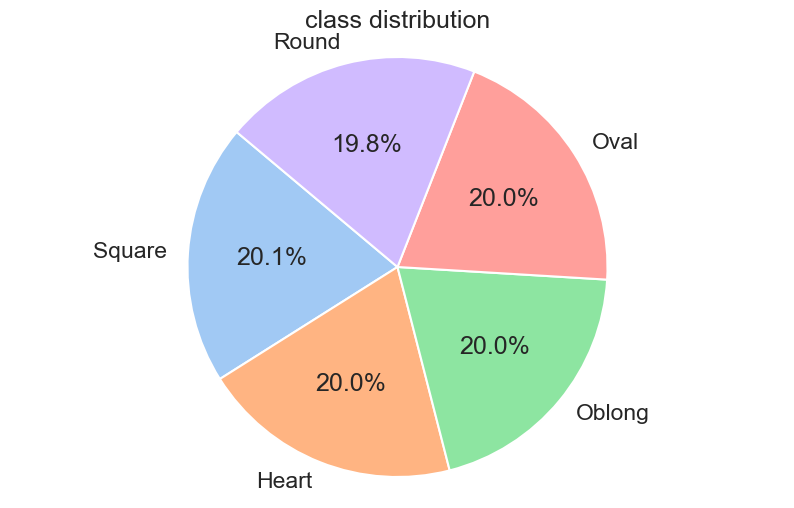

In [9]:
# plotting style
sns.set(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (10, 6)

#visualization overall class distribution
# create pie chart
overall_counts = df['label'].value_counts()
labels = overall_counts.index.tolist()
sizes = overall_counts.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
ax.axis('equal') # drown pie as a circle
plt.title('class distribution')
plt.show()

In [10]:
#add column indicating split for analysis later
train_df = train_df.copy()
test_df = test_df.copy()
val_df = val_df.copy()
train_df['split'] = 'Train'
test_df['split'] = 'Test'
val_df['split'] = 'Validation'

#combined splits into one df for visualization
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
print('\nsamples per split: ')
print(combined_df['split'].value_counts())


samples per split: 
split
Train         3485
Validation     996
Test           498
Name: count, dtype: int64


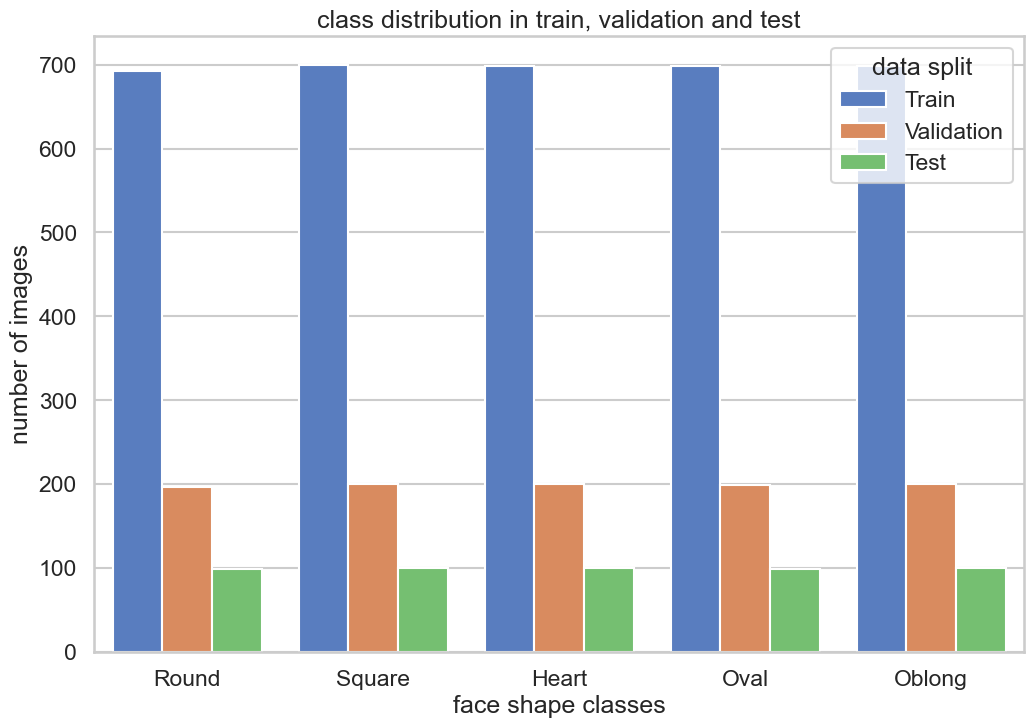

In [11]:
#visualize distribution per split
#countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='label', hue='split', palette='muted')
plt.title('class distribution in train, validation and test')
plt.xlabel('face shape classes')
plt.ylabel('number of images')
plt.legend(title='data split')
plt.show()

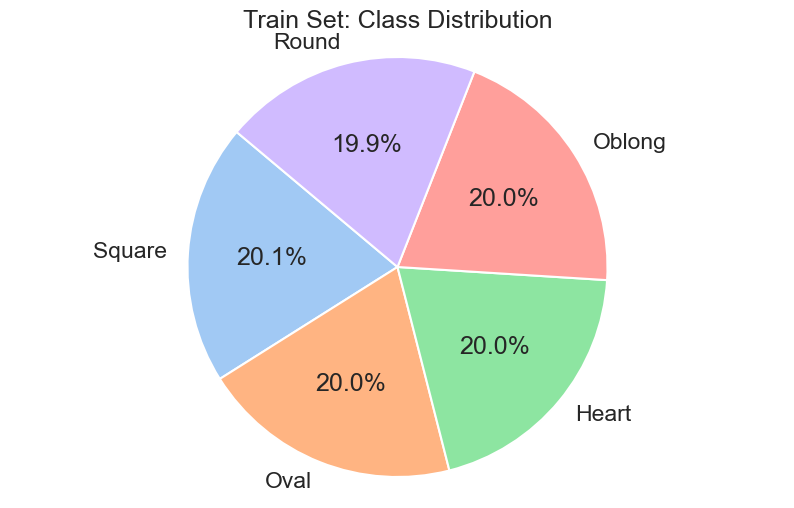

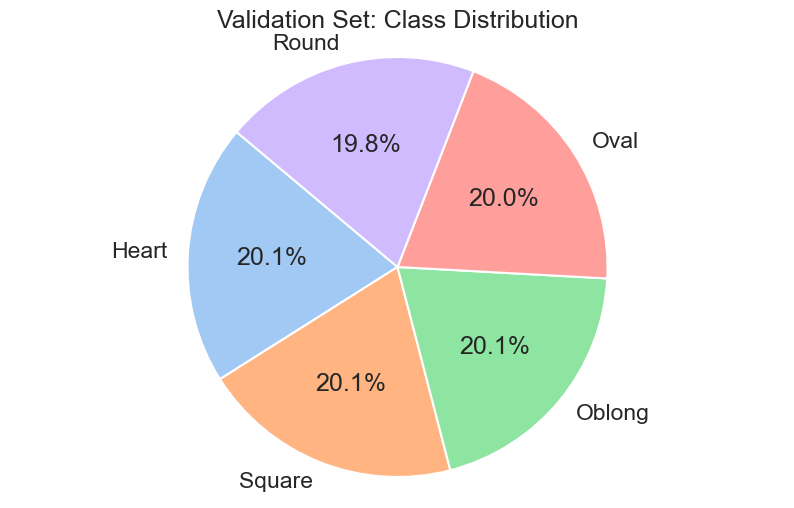

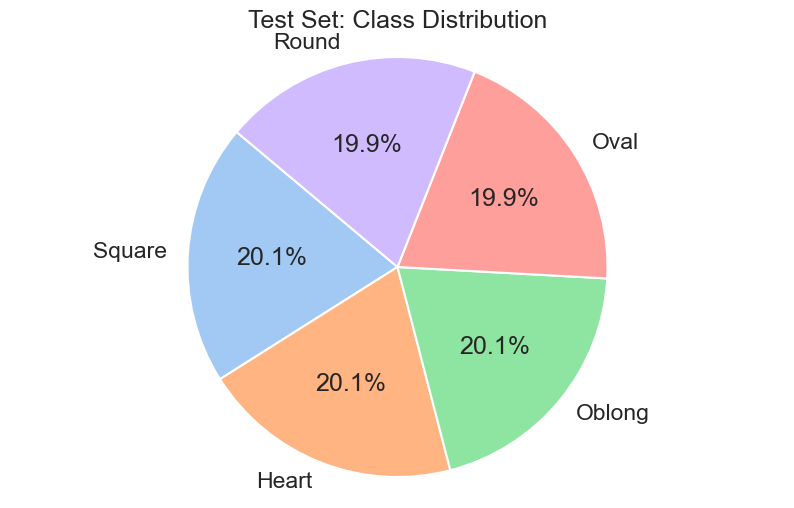

In [12]:
#chart per split for detailed view
splits = ['Train', 'Validation', 'Test']
for s in splits:
    subset = combined_df[combined_df['split'] == s]
    counts = subset['label'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.tolist()
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.axis('equal')
    plt.title(f"{s} Set: Class Distribution")
    plt.show()

In [13]:
# -----------------------------
# Step 4: Additional Analysis - Display Sample Images
# -----------------------------
# Helper function to display images in a grid
def display_images(image_paths, title, cols=5):
    rows = (len(image_paths) + cols - 1) // cols
    plt.figure(figsize=(15, 3 * rows))
    for i, path in enumerate(image_paths):
        plt.subplot(rows, cols, i + 1)
        try:
            image = Image.open(path)
            plt.imshow(image)
            plt.axis("off")
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

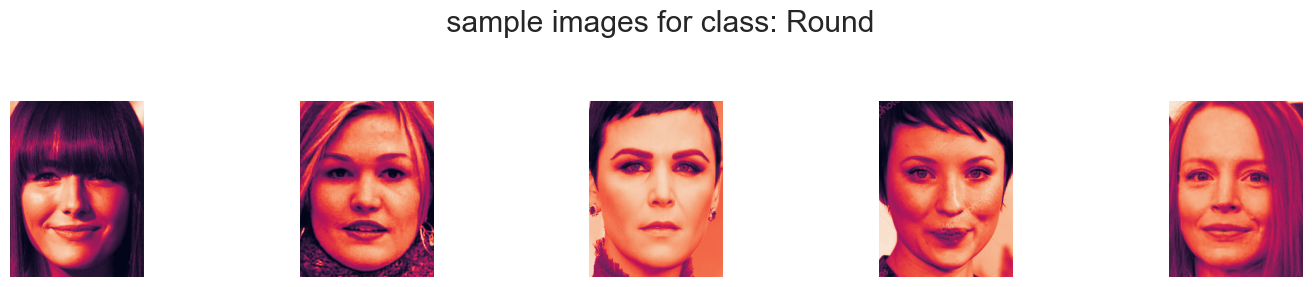

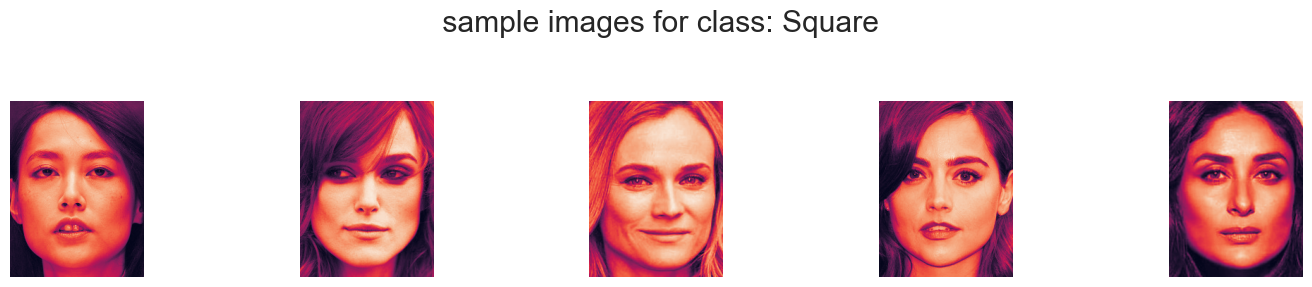

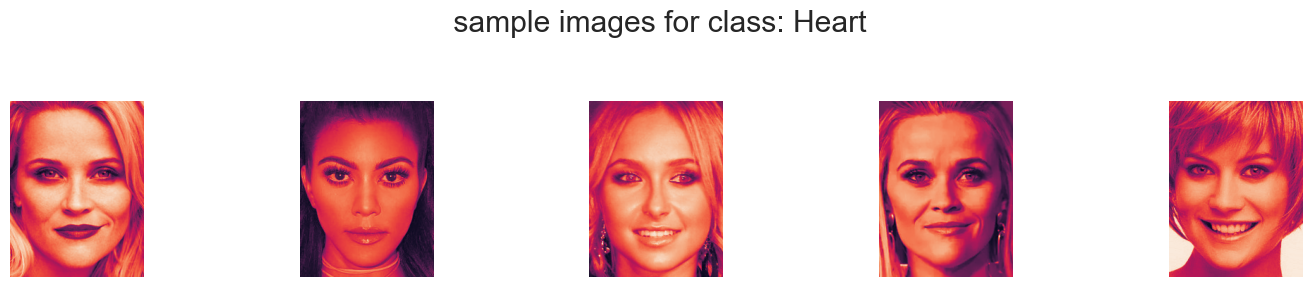

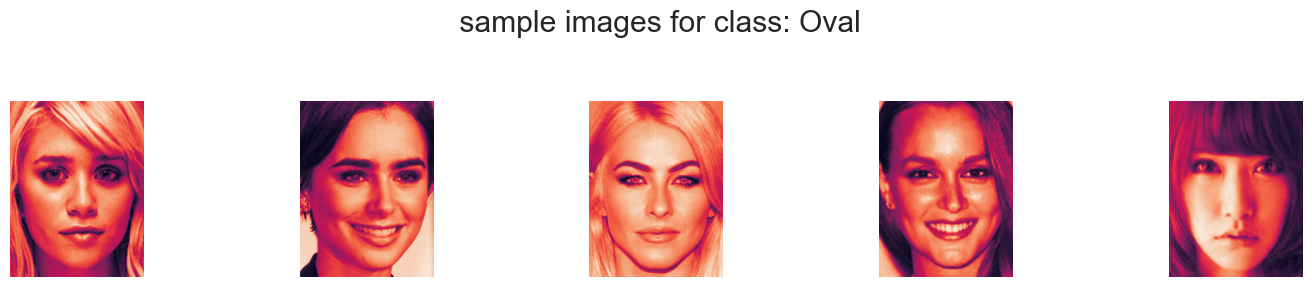

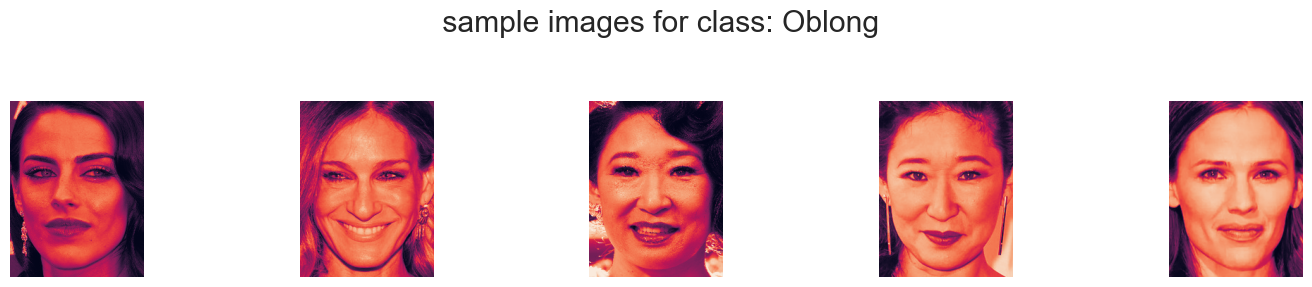

In [14]:
# from each class of train, select 5 random sample images
unique_classes = train_df['label'].unique()
for cls in unique_classes:
    sample_paths = train_df[train_df['label'] == cls]['filepath'].tolist()
    sample_paths = random.sample(sample_paths, min(5, len(sample_paths)))
    display_images(sample_paths, title=f' sample images for class: {cls}')

transformation and augmentations

In [15]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [16]:
#configuration
IMAGE_SIZE = 224
BATCH_SIZE = 64
NUM_WORKERS = 0
CSV_PATHS = {
    "train": "train_data.csv",
    "val": "val_data.csv",
    "test": "test_data.csv"
}

train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),

    transforms.RandomAffine(
        degrees=10,
        translate=(0.05, 0.05)
    ),

    transforms.ColorJitter(
        brightness=0.15,
        contrast=0.15,
        saturation=0.1,
        hue=0.02
    ),

    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),

    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# ========================
# Custom Dataset Class
# ========================
class FaceShapeDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # Encode labels to integers
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(self.data['label'].unique()))}
        self.idx_to_label = {idx: label for label, idx in self.label_to_idx.items()}
        self.data['label_idx'] = self.data['label'].map(self.label_to_idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['filepath']
        label = self.data.iloc[idx]['label_idx']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


# ========================
# DataLoader Setup
# ========================
def get_dataloaders():
    train_dataset = FaceShapeDataset(CSV_PATHS["train"], transform=train_transforms)
    val_dataset = FaceShapeDataset(CSV_PATHS["val"], transform=val_test_transforms)
    test_dataset = FaceShapeDataset(CSV_PATHS["test"], transform=val_test_transforms)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    return train_loader, val_loader, test_loader, train_dataset.idx_to_label


        

In [17]:
train_loader, val_loader, test_loader, idx_to_label = get_dataloaders()
print('dataloaders ready :D')

dataloaders ready :D


In [18]:
#preview first batch
images, labels = next(iter(train_loader))
print(f'image batch shape: {images.shape}')
print(f'labels: {labels[:10]}')
print(f'decoded labels: {[idx_to_label[int(lbl)] for lbl in labels[:10]]}')

image batch shape: torch.Size([64, 3, 224, 224])
labels: tensor([3, 1, 2, 4, 4, 1, 3, 3, 4, 0])
decoded labels: ['Round', 'Oblong', 'Oval', 'Square', 'Square', 'Oblong', 'Round', 'Round', 'Square', 'Heart']


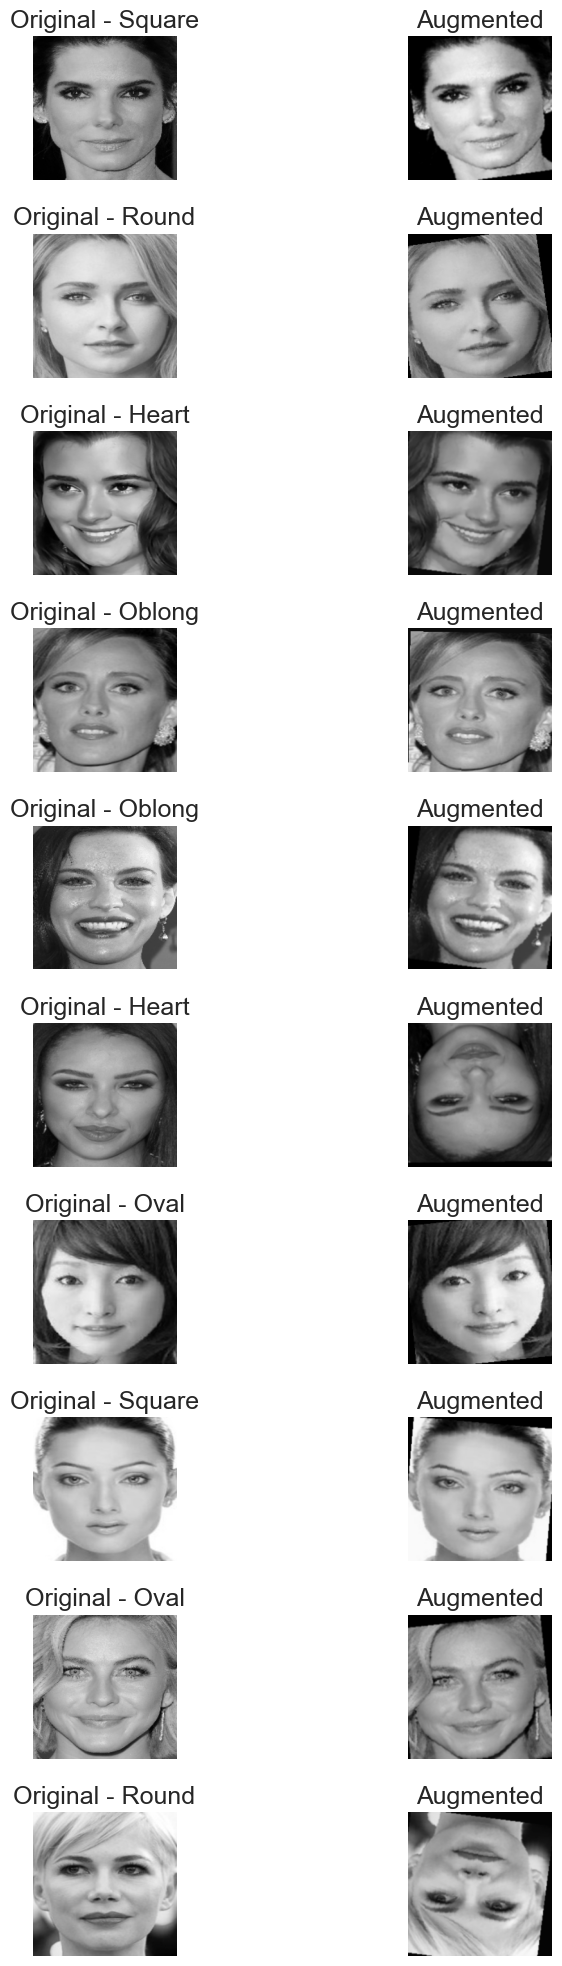

In [19]:
# Use existing config

IMAGE_SIZE = 224
CSV_PATH = "train_data.csv"

# ----------------------------
# Define transforms
# ----------------------------
original_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
])

# Your existing augmentation pipeline
augmented_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1, hue=0.02),
    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
])

# ----------------------------
# Load and sample data
# ----------------------------
df = pd.read_csv(CSV_PATH)
sample_df = df.sample(n=10, random_state=42).reset_index(drop=True)

# ----------------------------
# Show original vs augmented
# ----------------------------
plt.figure(figsize=(10, 20))
for i, row in sample_df.iterrows():
    img_path = row['filepath']
    label = row['label']
    img = Image.open(img_path).convert("RGB")
    
    original = original_transform(img)
    augmented = augmented_transform(img)

    # Original
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(original)
    plt.title(f"Original - {label}")
    plt.axis("off")

    # Augmented
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(augmented)
    plt.title("Augmented")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [20]:
print(torch.__version__)

2.7.0+cu118


In [21]:
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")

CUDA is available!
Current CUDA device: 0
Number of available GPUs: 1
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU


creating model

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class FaceShapeCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(FaceShapeCNN, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # (224x224) -> (224x224)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (224x224) -> (112x112)

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (112x112) -> (56x56)

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (56x56) -> (28x28)

            # Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (28x28) -> (14x14)

            # Global Average Pooling
            nn.AdaptiveAvgPool2d((1, 1))  # (14x14) -> (1x1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),               # (256, 1, 1) -> (256)
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [23]:
from torchsummary import summary

In [24]:
#instantiate the model

model = FaceShapeCNN(num_classes=5)

#move to gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

#model summ
print(model)

FaceShapeCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=

In [25]:
summary(model, (3, 224, 224)) # adjusted input shape to 224 * 224 for resized images

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,248
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,928
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

In [26]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor='loss'):
        """
        patience: How many epochs to wait before stopping.
        verbose: Whether to print progress.
        delta: Minimum change to qualify as an improvement.
        monitor: What to monitor ('loss' or 'accuracy').
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')  # Initialize based on monitor type
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor  # What to monitor: 'loss' or 'accuracy'

    def __call__(self, val_score, epoch, model_weights, model_name_prefix):
        """
        val_score: The validation loss/accuracy in the current epoch.
        epoch: The current epoch.
        model_weights: The weights of the model (usually model.state_dict()).
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        # If monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1
        # If monitoring 'accuracy', we expect the value to increase
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1

        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f"Early stopping triggered after {self.counter} epochs of no improvement.")

    def save_best_weights(self, model_weights, model_name_prefix):
        """
        Save the model weights with a unique name for each model.
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        model_name = f"{model_name_prefix}_epoch_{self.best_epoch + 1}.pth"

        # Clean up previous saved model files (optional, to avoid disk clutter)
        for file in os.listdir():
            if file.startswith(model_name_prefix) and file != model_name:
                os.remove(file)
                if self.verbose:
                    print(f"🗑️ Deleted old model file: {file}")

        torch.save(model_weights, model_name)
        if self.verbose:
            print(f"✅ Best model weights saved to {model_name}.")

In [27]:
#train loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None

def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25, device=None, early_stopping=None):

    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):

                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())


        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model.state_dict(), model_name_prefix="model")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch+1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model.load_state_dict(torch.load("model_epoch_{}.pth".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)


    return model





# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Helper function to plot losses, accuracies, and AUC scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(16, 8))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, valid_losses, label='Validation Loss', color='red')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='red')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()



    plt.tight_layout()
    plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

def test_model(model, test_loader, criterion, device, num_classes=5):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler


# ✅ Class weights (based on your dataset size)
# Assuming classes like this: [200, 200, 199, 197, 200]
class_counts = torch.tensor([200, 200, 199, 197, 200], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

# ✅ Optimizer
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,              # Raised for better initial learning
    weight_decay=2e-4     # Softer regularization
)

# ✅ LR Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,           # More aggressive drop
    patience=3,           # React quicker to plateaus
    threshold=0.001,
    #verbose=True
)

# ✅ AMP for speed
scaler = GradScaler()

# ✅ Epochs
num_epochs = 100

print(f"✅ Model Initialized on {device}")

✅ Model Initialized on cuda


C:\Users\USER\AppData\Local\Temp\ipykernel_10824\494326155.py:33: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/100
--------------------------------------------------
Training Loss: 1.6194, Accuracy: 0.2121
Validation Loss: 1.5983, Accuracy: 0.2460
🗑️ Deleted old model file: model_epoch_67.pth
✅ Best model weights saved to model_epoch_1.pth.


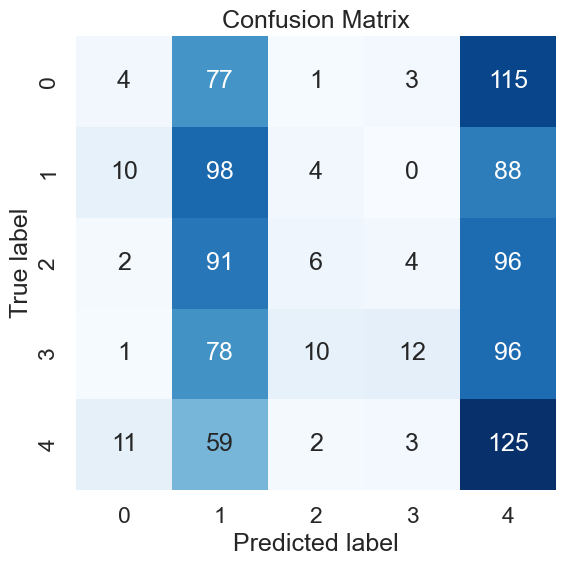

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.02      0.04       200
           1       0.24      0.49      0.33       200
           2       0.26      0.03      0.05       199
           3       0.55      0.06      0.11       197
           4       0.24      0.62      0.35       200

    accuracy                           0.25       996
   macro avg       0.29      0.25      0.17       996
weighted avg       0.29      0.25      0.17       996

Epoch 2/100
--------------------------------------------------
Training Loss: 1.6065, Accuracy: 0.2316
Validation Loss: 1.6061, Accuracy: 0.2390
Epoch 3/100
--------------------------------------------------
Training Loss: 1.5971, Accuracy: 0.2471
Validation Loss: 1.5909, Accuracy: 0.2480
🗑️ Deleted old model file: model_epoch_1.pth
✅ Best model weights saved to model_epoch_3.pth.
Epoch 4/100
--------------------------------------------------
Training Loss: 1.5936, Accuracy: 0.2534
V

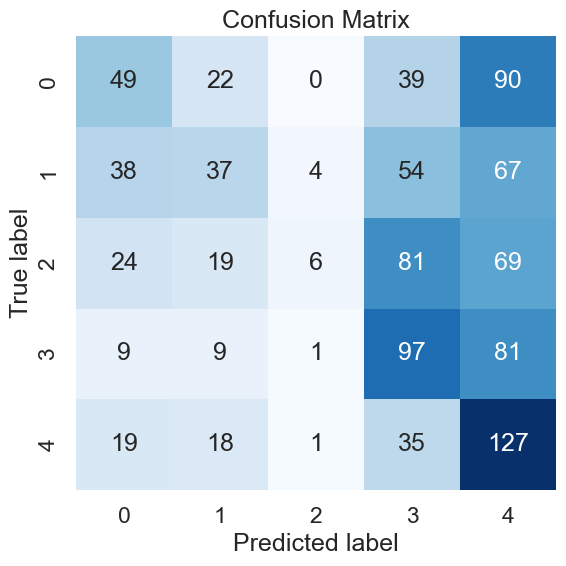

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.24      0.29       200
           1       0.35      0.18      0.24       200
           2       0.50      0.03      0.06       199
           3       0.32      0.49      0.39       197
           4       0.29      0.64      0.40       200

    accuracy                           0.32       996
   macro avg       0.36      0.32      0.27       996
weighted avg       0.36      0.32      0.27       996

Epoch 7/100
--------------------------------------------------
Training Loss: 1.5635, Accuracy: 0.2714
Validation Loss: 1.7077, Accuracy: 0.2249
Epoch 8/100
--------------------------------------------------
Training Loss: 1.5559, Accuracy: 0.2841
Validation Loss: 1.5405, Accuracy: 0.2892
🗑️ Deleted old model file: model_epoch_6.pth
✅ Best model weights saved to model_epoch_8.pth.
Epoch 9/100
--------------------------------------------------
Training Loss: 1.5473, Accuracy: 0.2912
V

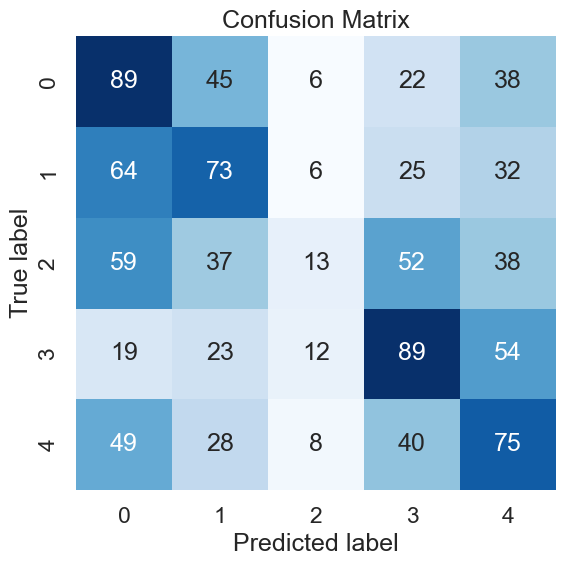

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.45      0.37       200
           1       0.35      0.36      0.36       200
           2       0.29      0.07      0.11       199
           3       0.39      0.45      0.42       197
           4       0.32      0.38      0.34       200

    accuracy                           0.34       996
   macro avg       0.33      0.34      0.32       996
weighted avg       0.33      0.34      0.32       996

Epoch 12/100
--------------------------------------------------
Training Loss: 1.5159, Accuracy: 0.3197
Validation Loss: 1.4772, Accuracy: 0.3464
🗑️ Deleted old model file: model_epoch_11.pth
✅ Best model weights saved to model_epoch_12.pth.
Epoch 13/100
--------------------------------------------------
Training Loss: 1.5049, Accuracy: 0.3202
Validation Loss: 1.4946, Accuracy: 0.3454
Epoch 14/100
--------------------------------------------------
Training Loss: 1.4971, Accuracy: 0.3

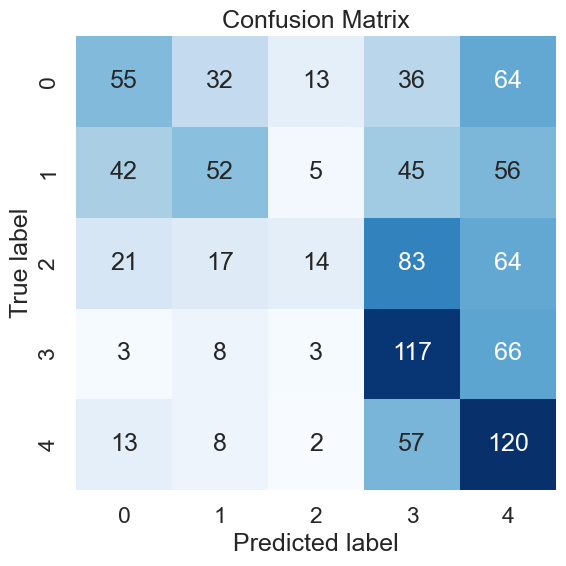

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.28      0.33       200
           1       0.44      0.26      0.33       200
           2       0.38      0.07      0.12       199
           3       0.35      0.59      0.44       197
           4       0.32      0.60      0.42       200

    accuracy                           0.36       996
   macro avg       0.38      0.36      0.33       996
weighted avg       0.38      0.36      0.33       996

Epoch 17/100
--------------------------------------------------
Training Loss: 1.4681, Accuracy: 0.3509
Validation Loss: 1.4325, Accuracy: 0.3544
🗑️ Deleted old model file: model_epoch_16.pth
✅ Best model weights saved to model_epoch_17.pth.
Epoch 18/100
--------------------------------------------------
Training Loss: 1.4524, Accuracy: 0.3535
Validation Loss: 1.4161, Accuracy: 0.3785
🗑️ Deleted old model file: model_epoch_17.pth
✅ Best model weights saved to model_epoch_18.pth.
Epoc

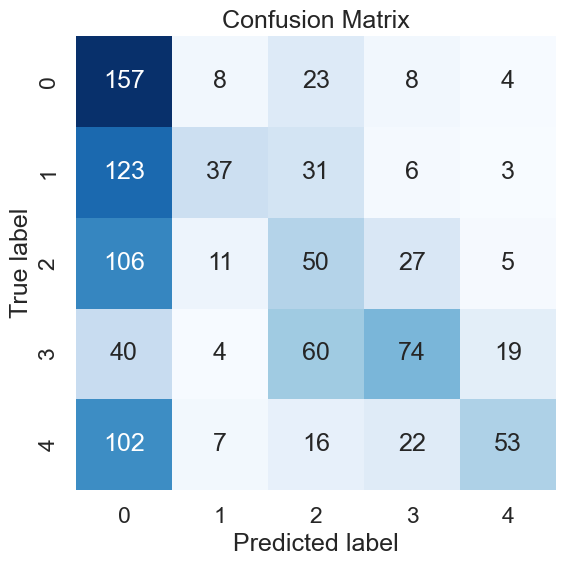

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.79      0.43       200
           1       0.55      0.18      0.28       200
           2       0.28      0.25      0.26       199
           3       0.54      0.38      0.44       197
           4       0.63      0.27      0.37       200

    accuracy                           0.37       996
   macro avg       0.46      0.37      0.36       996
weighted avg       0.46      0.37      0.36       996

Epoch 22/100
--------------------------------------------------
Training Loss: 1.3984, Accuracy: 0.3934
Validation Loss: 1.4783, Accuracy: 0.3735
Epoch 23/100
--------------------------------------------------
Training Loss: 1.3770, Accuracy: 0.4095
Validation Loss: 1.5146, Accuracy: 0.3434
Epoch 24/100
--------------------------------------------------
Training Loss: 1.3541, Accuracy: 0.4215
Validation Loss: 1.3035, Accuracy: 0.4157
🗑️ Deleted old model file: model_epoch_18.pth
✅ Be

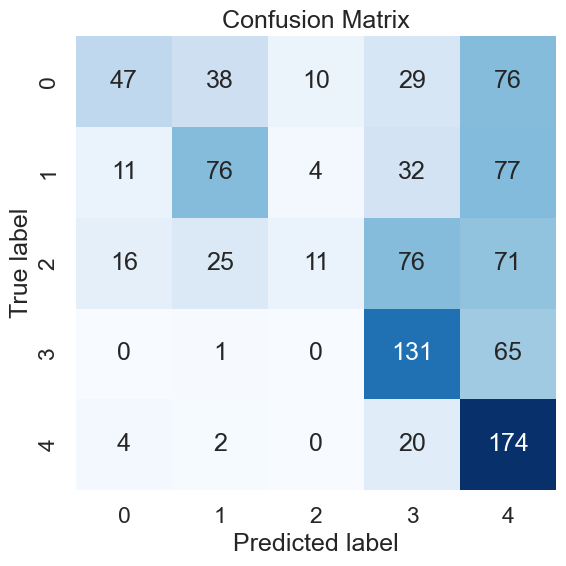

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.23      0.34       200
           1       0.54      0.38      0.44       200
           2       0.44      0.06      0.10       199
           3       0.45      0.66      0.54       197
           4       0.38      0.87      0.52       200

    accuracy                           0.44       996
   macro avg       0.48      0.44      0.39       996
weighted avg       0.48      0.44      0.39       996

Epoch 27/100
--------------------------------------------------
Training Loss: 1.3127, Accuracy: 0.4387
Validation Loss: 1.2873, Accuracy: 0.4789
🗑️ Deleted old model file: model_epoch_24.pth
✅ Best model weights saved to model_epoch_27.pth.
Epoch 28/100
--------------------------------------------------
Training Loss: 1.2918, Accuracy: 0.4628
Validation Loss: 1.5301, Accuracy: 0.3193
Epoch 29/100
--------------------------------------------------
Training Loss: 1.2851, Accuracy: 0.4

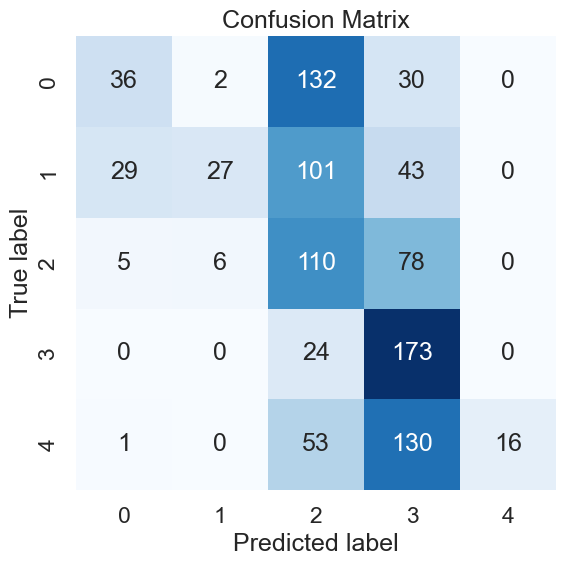

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.18      0.27       200
           1       0.77      0.14      0.23       200
           2       0.26      0.55      0.36       199
           3       0.38      0.88      0.53       197
           4       1.00      0.08      0.15       200

    accuracy                           0.36       996
   macro avg       0.58      0.37      0.31       996
weighted avg       0.59      0.36      0.31       996

Epoch 32/100
--------------------------------------------------
Training Loss: 1.2142, Accuracy: 0.5065
Validation Loss: 1.1306, Accuracy: 0.5723
🗑️ Deleted old model file: model_epoch_27.pth
✅ Best model weights saved to model_epoch_32.pth.
Epoch 33/100
--------------------------------------------------
Training Loss: 1.1903, Accuracy: 0.5067
Validation Loss: 1.1813, Accuracy: 0.4940
Epoch 34/100
--------------------------------------------------
Training Loss: 1.1703, Accuracy: 0.5

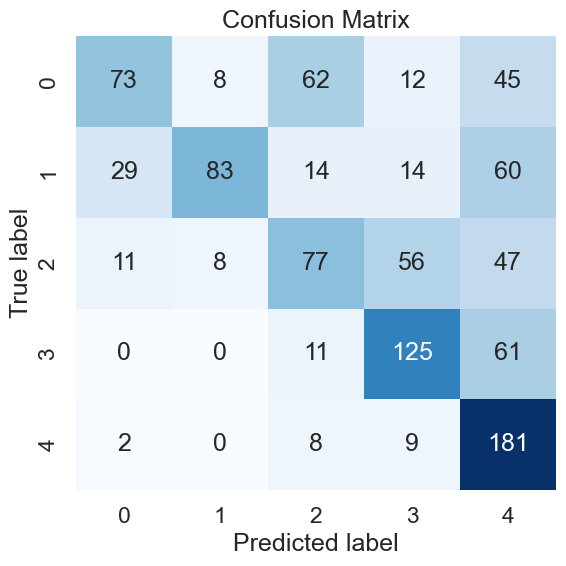

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.36      0.46       200
           1       0.84      0.41      0.56       200
           2       0.45      0.39      0.42       199
           3       0.58      0.63      0.61       197
           4       0.46      0.91      0.61       200

    accuracy                           0.54       996
   macro avg       0.59      0.54      0.53       996
weighted avg       0.59      0.54      0.53       996

Epoch 37/100
--------------------------------------------------
Training Loss: 1.1327, Accuracy: 0.5409
Validation Loss: 1.0399, Accuracy: 0.6004
🗑️ Deleted old model file: model_epoch_35.pth
✅ Best model weights saved to model_epoch_37.pth.
Epoch 38/100
--------------------------------------------------
Training Loss: 1.1238, Accuracy: 0.5472
Validation Loss: 1.0097, Accuracy: 0.6205
🗑️ Deleted old model file: model_epoch_37.pth
✅ Best model weights saved to model_epoch_38.pth.
Epoc

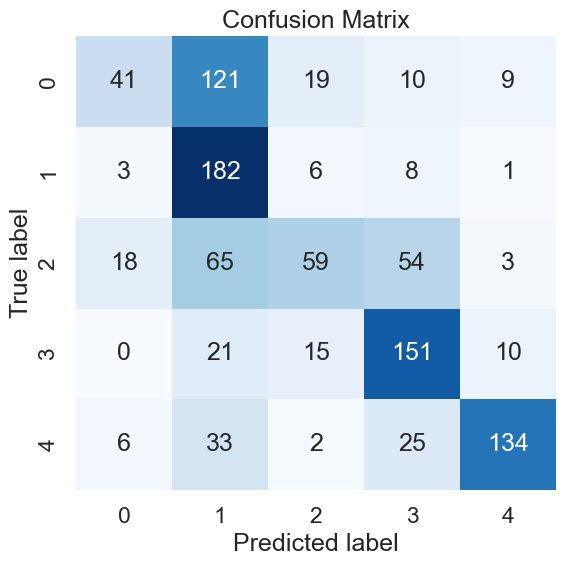

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.20      0.31       200
           1       0.43      0.91      0.59       200
           2       0.58      0.30      0.39       199
           3       0.61      0.77      0.68       197
           4       0.85      0.67      0.75       200

    accuracy                           0.57       996
   macro avg       0.62      0.57      0.54       996
weighted avg       0.62      0.57      0.54       996

Epoch 42/100
--------------------------------------------------
Training Loss: 1.0815, Accuracy: 0.5633
Validation Loss: 1.0538, Accuracy: 0.5683
Epoch 43/100
--------------------------------------------------
Training Loss: 1.0574, Accuracy: 0.5745
Validation Loss: 0.9309, Accuracy: 0.6446
🗑️ Deleted old model file: model_epoch_38.pth
✅ Best model weights saved to model_epoch_43.pth.
Epoch 44/100
--------------------------------------------------
Training Loss: 1.0531, Accuracy: 0.5

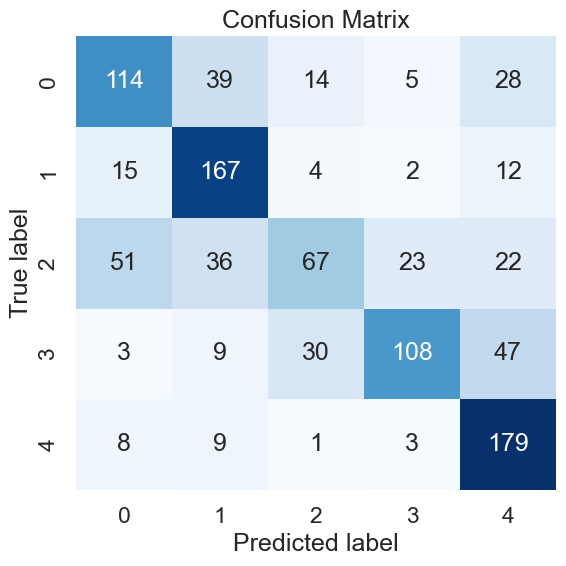

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       200
           1       0.64      0.83      0.73       200
           2       0.58      0.34      0.43       199
           3       0.77      0.55      0.64       197
           4       0.62      0.90      0.73       200

    accuracy                           0.64       996
   macro avg       0.64      0.64      0.62       996
weighted avg       0.64      0.64      0.62       996

Epoch 47/100
--------------------------------------------------
Training Loss: 1.0227, Accuracy: 0.5891
Validation Loss: 0.9069, Accuracy: 0.6516
Epoch 48/100
--------------------------------------------------
Training Loss: 1.0200, Accuracy: 0.5891
Validation Loss: 1.1424, Accuracy: 0.5512
Epoch 49/100
--------------------------------------------------
Training Loss: 1.0083, Accuracy: 0.5968
Validation Loss: 0.9059, Accuracy: 0.6717
Epoch 50/100
-------------------------------------

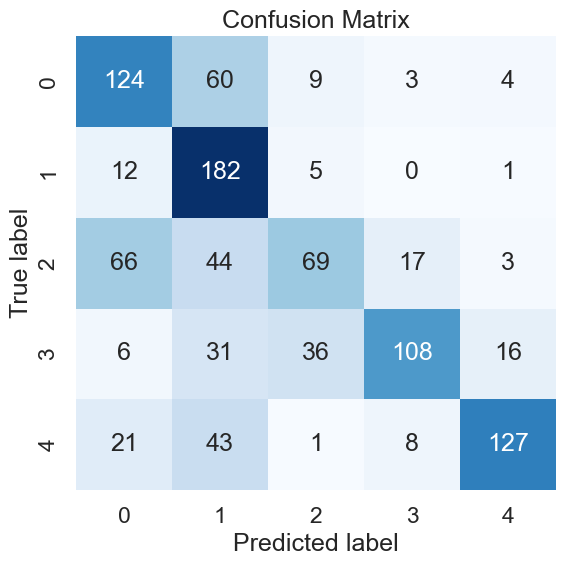

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       200
           1       0.51      0.91      0.65       200
           2       0.57      0.35      0.43       199
           3       0.79      0.55      0.65       197
           4       0.84      0.64      0.72       200

    accuracy                           0.61       996
   macro avg       0.65      0.61      0.61       996
weighted avg       0.65      0.61      0.61       996

Epoch 52/100
--------------------------------------------------
Training Loss: 0.9931, Accuracy: 0.6118
Validation Loss: 0.8813, Accuracy: 0.6687
🗑️ Deleted old model file: model_epoch_44.pth
✅ Best model weights saved to model_epoch_52.pth.
Epoch 53/100
--------------------------------------------------
Training Loss: 1.0019, Accuracy: 0.5917
Validation Loss: 0.8634, Accuracy: 0.6928
🗑️ Deleted old model file: model_epoch_52.pth
✅ Best model weights saved to model_epoch_53.pth.
Epoc

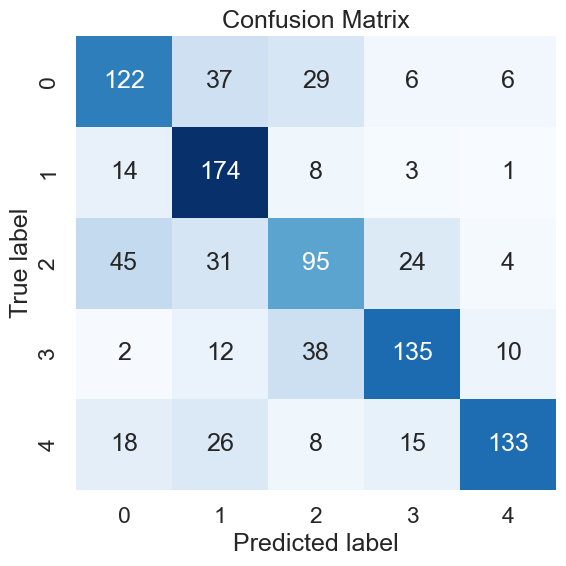

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       200
           1       0.62      0.87      0.72       200
           2       0.53      0.48      0.50       199
           3       0.74      0.69      0.71       197
           4       0.86      0.67      0.75       200

    accuracy                           0.66       996
   macro avg       0.67      0.66      0.66       996
weighted avg       0.67      0.66      0.66       996

Epoch 57/100
--------------------------------------------------
Training Loss: 0.9849, Accuracy: 0.6072
Validation Loss: 0.9010, Accuracy: 0.6767
Epoch 58/100
--------------------------------------------------
Training Loss: 0.9867, Accuracy: 0.6026
Validation Loss: 0.8733, Accuracy: 0.6727
Epoch 59/100
--------------------------------------------------
Training Loss: 0.9861, Accuracy: 0.6032
Validation Loss: 0.8408, Accuracy: 0.6737
🗑️ Deleted old model file: model_epoch_55.pth
✅ Be

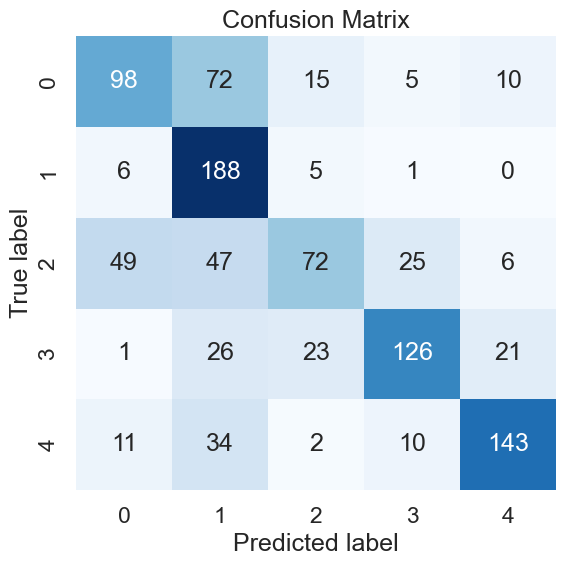

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.49      0.54       200
           1       0.51      0.94      0.66       200
           2       0.62      0.36      0.46       199
           3       0.75      0.64      0.69       197
           4       0.79      0.71      0.75       200

    accuracy                           0.63       996
   macro avg       0.65      0.63      0.62       996
weighted avg       0.65      0.63      0.62       996

Epoch 62/100
--------------------------------------------------
Training Loss: 1.0011, Accuracy: 0.6003
Validation Loss: 0.8349, Accuracy: 0.6938
🗑️ Deleted old model file: model_epoch_59.pth
✅ Best model weights saved to model_epoch_62.pth.
Epoch 63/100
--------------------------------------------------
Training Loss: 0.9659, Accuracy: 0.6132
Validation Loss: 0.8954, Accuracy: 0.6757
Epoch 64/100
--------------------------------------------------
Training Loss: 0.9843, Accuracy: 0.6

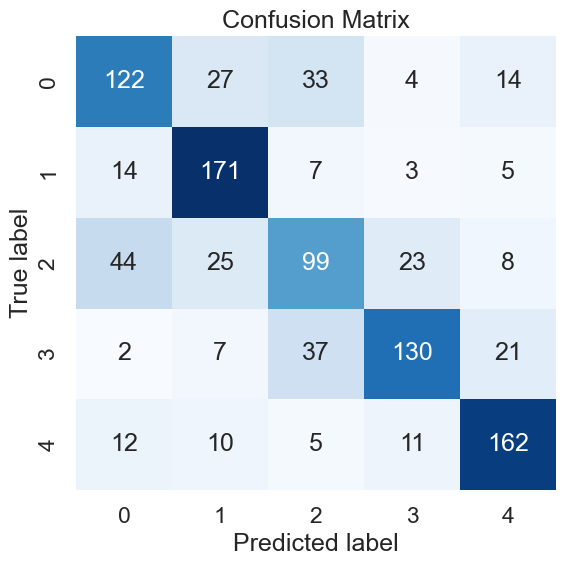

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       200
           1       0.71      0.85      0.78       200
           2       0.55      0.50      0.52       199
           3       0.76      0.66      0.71       197
           4       0.77      0.81      0.79       200

    accuracy                           0.69       996
   macro avg       0.68      0.69      0.68       996
weighted avg       0.68      0.69      0.68       996

Epoch 67/100
--------------------------------------------------
Training Loss: 0.9710, Accuracy: 0.6247
Validation Loss: 0.8300, Accuracy: 0.6898
🗑️ Deleted old model file: model_epoch_62.pth
✅ Best model weights saved to model_epoch_67.pth.
Epoch 68/100
--------------------------------------------------
Training Loss: 0.9440, Accuracy: 0.6278
Validation Loss: 0.8393, Accuracy: 0.6777
Epoch 69/100
--------------------------------------------------
Training Loss: 0.9445, Accuracy: 0.6

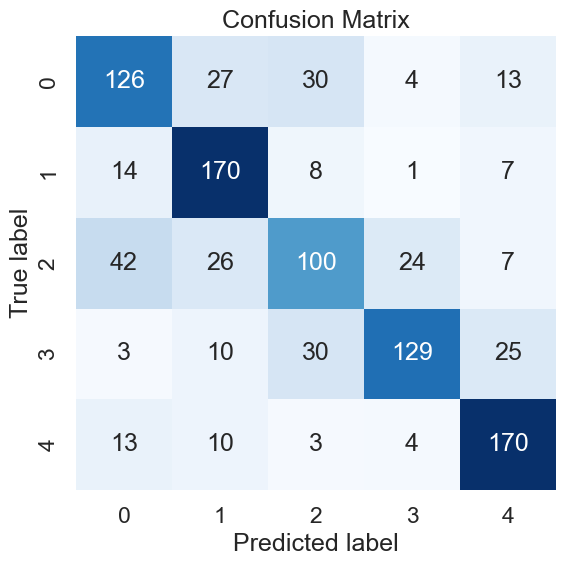

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       200
           1       0.70      0.85      0.77       200
           2       0.58      0.50      0.54       199
           3       0.80      0.65      0.72       197
           4       0.77      0.85      0.81       200

    accuracy                           0.70       996
   macro avg       0.70      0.70      0.69       996
weighted avg       0.70      0.70      0.69       996

Epoch 72/100
--------------------------------------------------
Training Loss: 0.9471, Accuracy: 0.6304
Validation Loss: 0.8389, Accuracy: 0.6857
Epoch 73/100
--------------------------------------------------
Training Loss: 0.9308, Accuracy: 0.6330
Validation Loss: 0.8114, Accuracy: 0.6928
🗑️ Deleted old model file: model_epoch_71.pth
✅ Best model weights saved to model_epoch_73.pth.
Epoch 74/100
--------------------------------------------------
Training Loss: 0.9455, Accuracy: 0.6

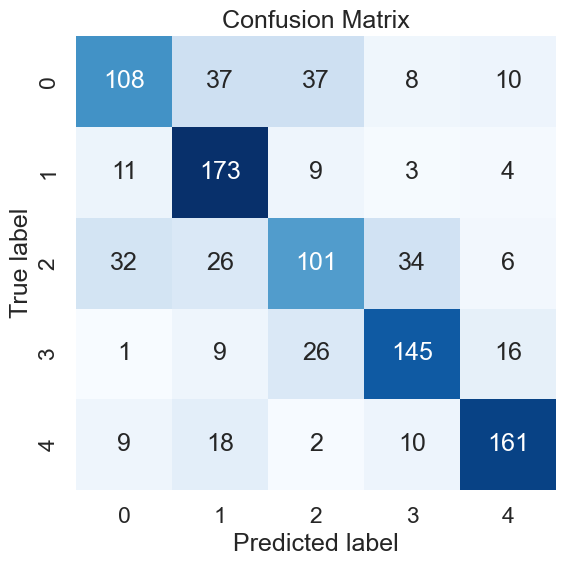

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       200
           1       0.66      0.86      0.75       200
           2       0.58      0.51      0.54       199
           3       0.72      0.74      0.73       197
           4       0.82      0.81      0.81       200

    accuracy                           0.69       996
   macro avg       0.69      0.69      0.69       996
weighted avg       0.69      0.69      0.69       996

Epoch 77/100
--------------------------------------------------
Training Loss: 0.9335, Accuracy: 0.6293
Validation Loss: 0.8730, Accuracy: 0.6536
Epoch 78/100
--------------------------------------------------
Training Loss: 0.9405, Accuracy: 0.6324
Validation Loss: 0.8328, Accuracy: 0.6817
Epoch 79/100
--------------------------------------------------
Training Loss: 0.9317, Accuracy: 0.6488
Validation Loss: 0.8083, Accuracy: 0.6938
🗑️ Deleted old model file: model_epoch_73.pth
✅ Be

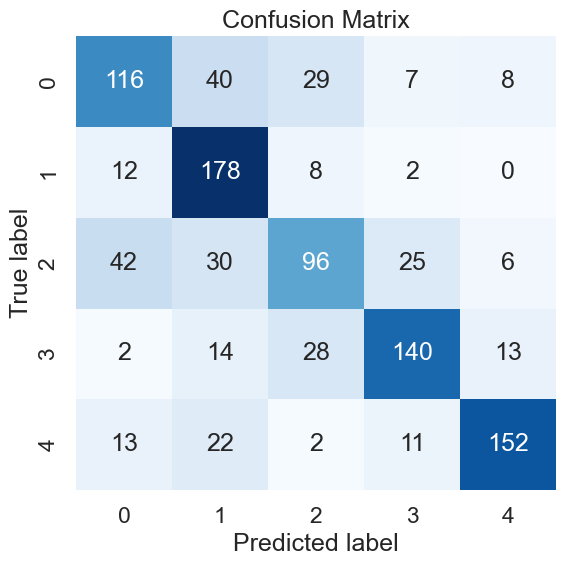

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60       200
           1       0.63      0.89      0.74       200
           2       0.59      0.48      0.53       199
           3       0.76      0.71      0.73       197
           4       0.85      0.76      0.80       200

    accuracy                           0.68       996
   macro avg       0.69      0.68      0.68       996
weighted avg       0.69      0.68      0.68       996

Epoch 82/100
--------------------------------------------------
Training Loss: 0.9357, Accuracy: 0.6356
Validation Loss: 0.8131, Accuracy: 0.6898
Epoch 83/100
--------------------------------------------------
Training Loss: 0.9350, Accuracy: 0.6250
Validation Loss: 0.8031, Accuracy: 0.7018
🗑️ Deleted old model file: model_epoch_79.pth
✅ Best model weights saved to model_epoch_83.pth.
Epoch 84/100
--------------------------------------------------
Training Loss: 0.9518, Accuracy: 0.6

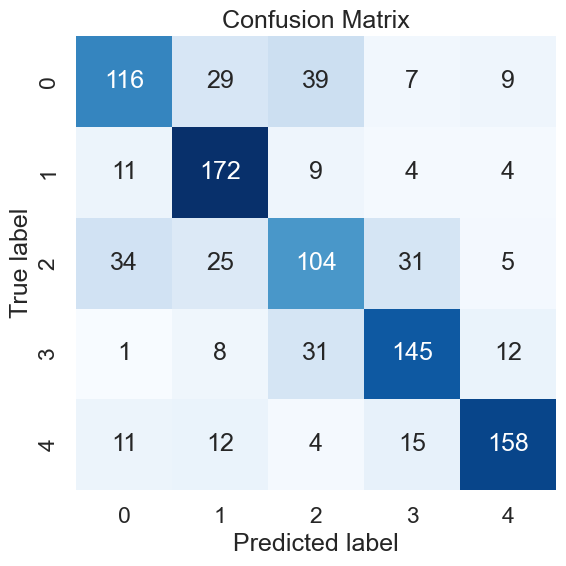

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       200
           1       0.70      0.86      0.77       200
           2       0.56      0.52      0.54       199
           3       0.72      0.74      0.73       197
           4       0.84      0.79      0.81       200

    accuracy                           0.70       996
   macro avg       0.70      0.70      0.69       996
weighted avg       0.70      0.70      0.69       996

Epoch 87/100
--------------------------------------------------
Training Loss: 0.9350, Accuracy: 0.6327
Validation Loss: 0.8097, Accuracy: 0.6928
Epoch 88/100
--------------------------------------------------
Training Loss: 0.9343, Accuracy: 0.6270
Validation Loss: 0.8213, Accuracy: 0.6898
Epoch 89/100
--------------------------------------------------
Training Loss: 0.9257, Accuracy: 0.6385
Validation Loss: 0.8190, Accuracy: 0.6888
Epoch 90/100
-------------------------------------

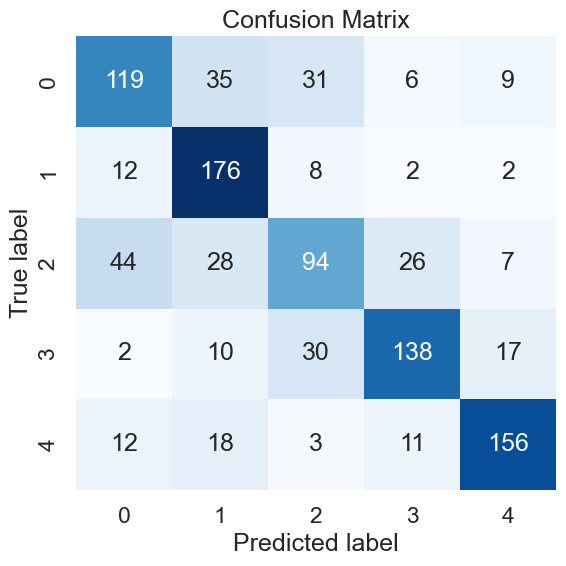

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       200
           1       0.66      0.88      0.75       200
           2       0.57      0.47      0.52       199
           3       0.75      0.70      0.73       197
           4       0.82      0.78      0.80       200

    accuracy                           0.69       996
   macro avg       0.69      0.69      0.68       996
weighted avg       0.69      0.69      0.68       996

Epoch 92/100
--------------------------------------------------
Training Loss: 0.9241, Accuracy: 0.6327
Validation Loss: 0.8108, Accuracy: 0.6948
Epoch 93/100
--------------------------------------------------
Training Loss: 0.9365, Accuracy: 0.6333
Validation Loss: 0.8061, Accuracy: 0.6918
Epoch 94/100
--------------------------------------------------
Training Loss: 0.9410, Accuracy: 0.6339
Validation Loss: 0.8049, Accuracy: 0.6928
Epoch 95/100
-------------------------------------

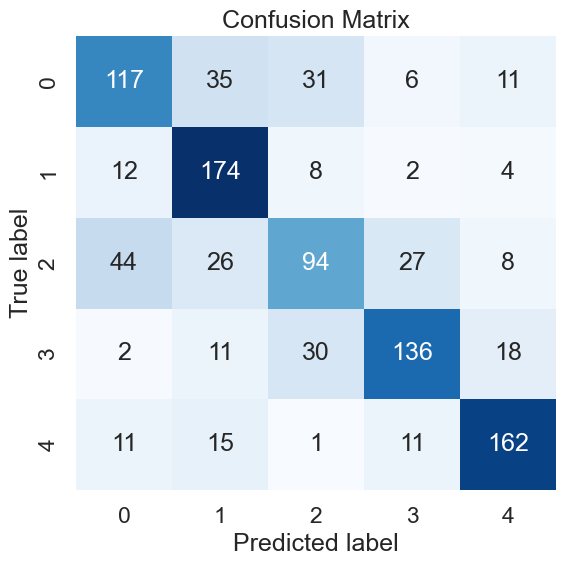

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       200
           1       0.67      0.87      0.75       200
           2       0.57      0.47      0.52       199
           3       0.75      0.69      0.72       197
           4       0.80      0.81      0.80       200

    accuracy                           0.69       996
   macro avg       0.68      0.69      0.68       996
weighted avg       0.68      0.69      0.68       996

Epoch 97/100
--------------------------------------------------
Training Loss: 0.9265, Accuracy: 0.6339
Validation Loss: 0.8111, Accuracy: 0.6958
Epoch 98/100
--------------------------------------------------
Training Loss: 0.9396, Accuracy: 0.6362
Validation Loss: 0.8249, Accuracy: 0.6817
Epoch 99/100
--------------------------------------------------
Training Loss: 0.9246, Accuracy: 0.6376
Validation Loss: 0.8055, Accuracy: 0.6908
Epoch 100/100
------------------------------------

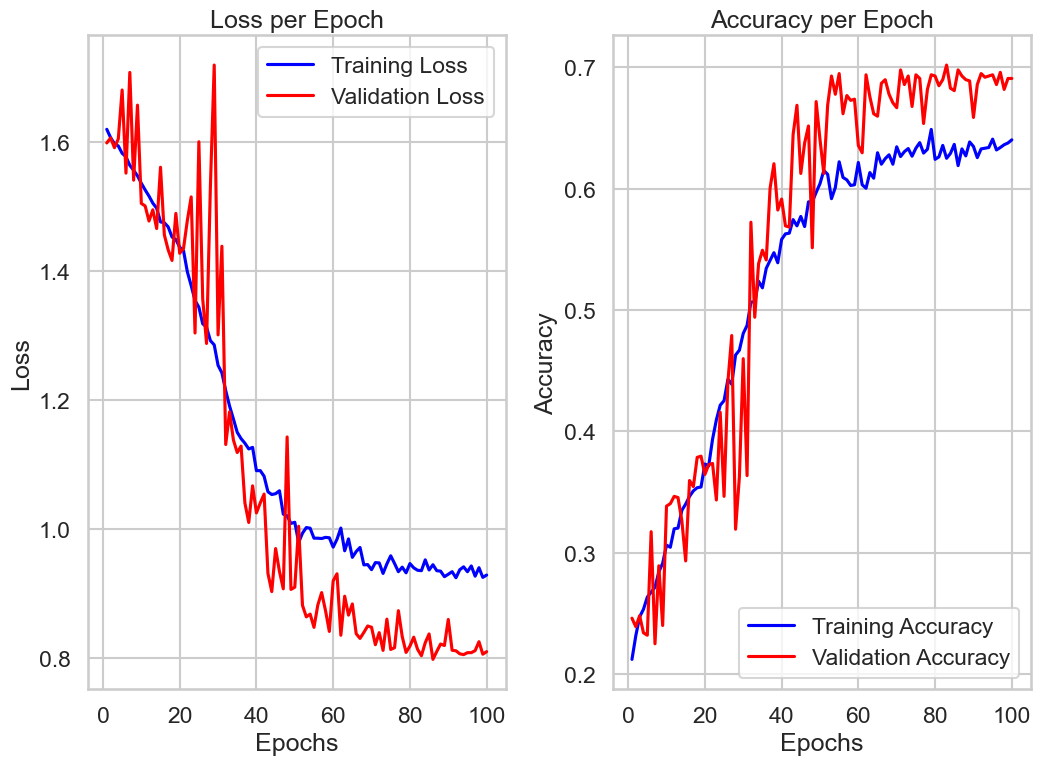

In [30]:
# Example:
early_stopping = EarlyStopping(patience=15, verbose=True, delta=0)
model_name_prefix = "CustomCNN1"  # Or dynamically change this per model
trained_model = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=100,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)

Test Loss: 0.8238, Test Accuracy: 0.6807
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       100
           1       0.72      0.87      0.79       100
           2       0.49      0.44      0.47        99
           3       0.69      0.73      0.71        99
           4       0.87      0.76      0.81       100

    accuracy                           0.68       498
   macro avg       0.68      0.68      0.68       498
weighted avg       0.68      0.68      0.68       498



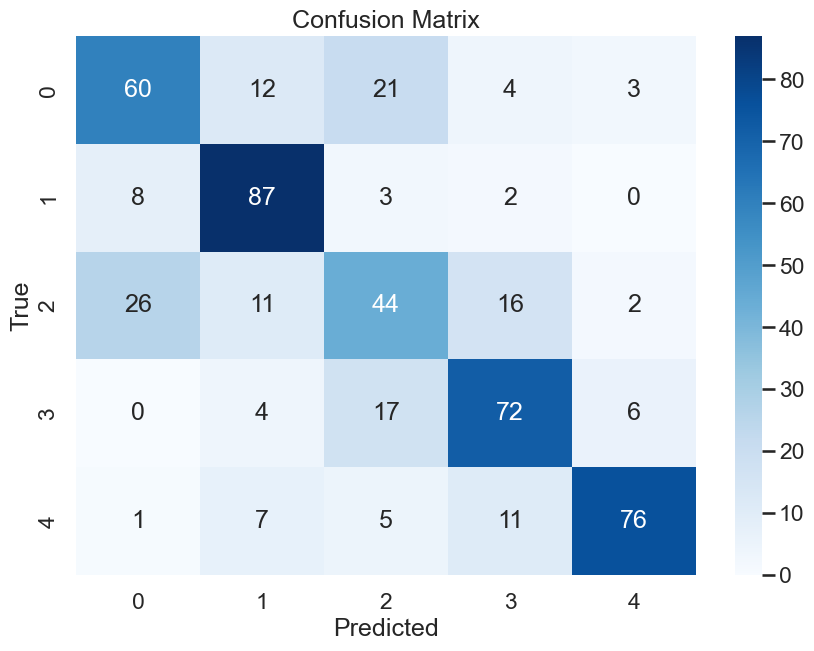

In [31]:
test_model(trained_model, test_loader, loss_fn, device, num_classes=5)

In [32]:
print([idx_to_label[i] for i in range(len(idx_to_label))])  

['Heart', 'Oblong', 'Oval', 'Round', 'Square']


In [33]:
print(idx_to_label)
# Output should be something like:
# {0: 'oval', 1: 'oblong', 2: 'heart', 3: 'round', 4: 'square'}


{0: 'Heart', 1: 'Oblong', 2: 'Oval', 3: 'Round', 4: 'Square'}


In [35]:
import os
import torch
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms

#  config
MODEL_PATH = 'model_epoch_86.pth'
TEST_FOLDER = 'faceshape_dataset/test'
SAVE_PATH = 'predictions.txt'
CSV_PATH = 'train_data.csv'
IMAGE_SIZE = 224
NUM_CLASSES = 5

df = pd.read_csv(CSV_PATH)
label_to_idx = {label: idx for idx, label in enumerate(sorted(df['label'].unique()))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model = FaceShapeCNN(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

def predict_all_images(model, folder_path, save_path):
    results = []
    valid_format = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    image_count = 0

    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(valid_format):
                image_path = os.path.join(root, filename)
                try:
                    img = Image.open(image_path).convert("RGB")
                    img_tensor = transform(img).unsqueeze(0).to(device)
                except Exception as e:
                    print(f"skipped {filename} (error: {e})")
                    continue

                with torch.no_grad():
                    output = model(img_tensor)
                    pred_idx = torch.argmax(output, dim=1).item()
                    pred_label = idx_to_label[pred_idx]

                results.append(f"{filename} --> Predicted: {pred_label}\n")
                image_count += 1

    with open(save_path, 'w') as f:
        f.writelines(results)

    print(f"\n✅ Done! {image_count} images processed.")
    print(f"📄 Predictions saved to: {save_path}")

predict_all_images(model, TEST_FOLDER, SAVE_PATH)



✅ Done! 998 images processed.
📄 Predictions saved to: predictions.txt


In [39]:
def predict_single_image(model, image_path):
    valid_exts = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    
    if not image_path.lower().endswith(valid_exts):
        print("❌ invalid image file format.")
        return

    try:
        img = Image.open(image_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)
    except Exception as e:
        print(f"❌ error loading image: {e}")
        return

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = idx_to_label[pred_idx]

    print(f"✅ predicted face shape: {pred_label}")

img_path = 'round1.jpg'
predict_single_image(model, img_path)



✅ predicted face shape: Oblong


In [ ]:
def predict_all_images_with_accuracy(model, folder_path, csv_path, save_path='predictions.txt'):
    df = pd.read_csv(csv_path)
    true_labels_dict = {os.path.basename(row['filepath']): row['label'] for _, row in df.iterrows()}

    results = []
    valid_format = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    correct = 0
    total = 0

    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(valid_format):
                image_path = os.path.join(root, filename)

                try:
                    img = Image.open(image_path).convert("RGB")
                    img_tensor = transform(img).unsqueeze(0).to(device)
                except Exception as e:
                    print(f"❌ Skipped {filename} (error: {e})")
                    continue

                with torch.no_grad():
                    output = model(img_tensor)
                    pred_idx = torch.argmax(output, dim=1).item()
                    pred_label = idx_to_label[pred_idx]

                true_label = true_labels_dict.get(filename, "Unknown")

                is_correct = pred_label == true_label
                if is_correct:
                    correct += 1
                total += 1

                results.append(f"{filename} --> Predicted: {pred_label} | Actual: {true_label} | {'✔' if is_correct else '❌'}\n")

    acc = correct / total if total else 0

    with open(save_path, 'w', encoding='utf-8') as f:
        f.writelines(results)

    print(f"\n✅ Done! {total} images processed.")
    print(f"📄 Predictions saved to: {save_path}")
    print(f"🎯 Prediction Accuracy: {acc:.4f}")


In [ ]:
predict_all_images_with_accuracy(model, TEST_FOLDER, csv_path='test_data.csv', save_path='predictions.txt')


In [37]:
def evaluate_from_csv(model, csv_path):
    df = pd.read_csv(csv_path)
    correct = 0
    total = 0

    for _, row in df.iterrows():
        image_path = row['filepath']
        true_label = row['label']

        try:
            img = Image.open(image_path).convert("RGB")
            img_tensor = transform(img).unsqueeze(0).to(device)
        except Exception as e:
            print(f"❌ Skipped {image_path} (error: {e})")
            continue

        with torch.no_grad():
            output = model(img_tensor)
            pred_idx = torch.argmax(output, dim=1).item()
            pred_label = idx_to_label[pred_idx]

        if pred_label == true_label:
            correct += 1
        total += 1

    acc = correct / total if total > 0 else 0
    print(f"\n🎯 Prediction Accuracy from CSV = {acc * 100:.2f}%")


In [38]:
evaluate_from_csv(model, 'test_data.csv')


🎯 Prediction Accuracy from CSV = 68.07%
